<a href="https://colab.research.google.com/github/EsraaMosaad/TECHNOHACKS-EDUTECH/blob/main/Task_3_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install imbalanced-learn

In [7]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 23.9MB/s]


In [10]:
!unzip /content/pima-indians-diabetes-database.zip

Archive:  /content/pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [71]:
data=pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Data preprossing**

In [38]:
from sklearn.preprocessing import StandardScaler

In [70]:
x_data=data.drop(['Outcome'],axis=1)
y_data=data['Outcome']

In [37]:
x_data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1  

**Z-score normalization (also known as standardization) transforms the data to have zero mean and unit variance.**

In [72]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(x_data)
normalized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# **Solve unbalanced data by using Random Undersampling**
Here we are going to reduce the size of majority class " class 1" and be same as minority class " class 0"

In [14]:
from matplotlib.pyplot import plot

In [15]:
y_data.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: ylabel='Outcome'>

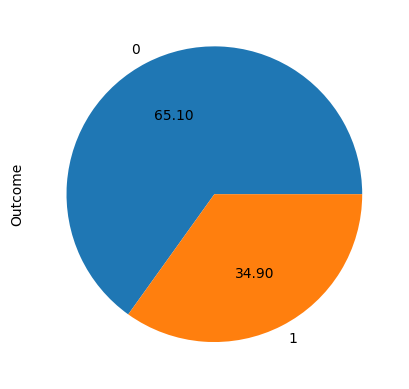

In [16]:
y_data.value_counts().plot.pie(autopct='%.2f')

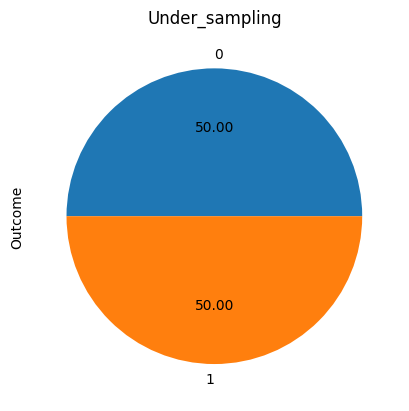

In [40]:
from imblearn.under_sampling import RandomUnderSampler


rus=RandomUnderSampler(sampling_strategy=1)

x_res_under,y_res_under=rus.fit_resample(normalized_data,y_data)

ax=y_res_under.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title('Under_sampling')

In [18]:
y_res_under.value_counts()

0    268
1    268
Name: Outcome, dtype: int64

# **Build a model (ANN) in tensorflow/keras**

In [23]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 10.7 MB/s eta 0:00:00


In [24]:
from tensorflow_addons import losses

In [25]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report


In [68]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(50, input_dim=8, activation='relu'),

        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        history=model.fit(X_train, y_train, epochs=30 , batch_size=62, validation_data=(X_test, y_test))
    else:
        history = model.fit(X_train, y_train, epochs=30, class_weight = weights , batch_size=62, validation_data=(X_test, y_test))

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

    return y_preds

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x_res_under, y_res_under, test_size=0.2, random_state=15, stratify=y_res_under)
y_train.value_counts()

0    214
1    214
Name: Outcome, dtype: int64

Epoch 1/30
7/7 [==============================] - 1s 34ms/step - loss: 0.7543 - accuracy: 0.3808 - val_loss: 0.7260 - val_accuracy: 0.4167
Epoch 2/30
7/7 [==============================] - 0s 11ms/step - loss: 0.7091 - accuracy: 0.4766 - val_loss: 0.6790 - val_accuracy: 0.5093
Epoch 3/30
7/7 [==============================] - 0s 11ms/step - loss: 0.6789 - accuracy: 0.5654 - val_loss: 0.6454 - val_accuracy: 0.6019
Epoch 4/30
7/7 [==============================] - 0s 11ms/step - loss: 0.6545 - accuracy: 0.6192 - val_loss: 0.6211 - val_accuracy: 0.6944
Epoch 5/30
7/7 [==============================] - 0s 11ms/step - loss: 0.6362 - accuracy: 0.6565 - val_loss: 0.6005 - val_accuracy: 0.7222
Epoch 6/30
7/7 [==============================] - 0s 9ms/step - loss: 0.6199 - accuracy: 0.6822 - val_loss: 0.5813 - val_accuracy: 0.7315
Epoch 7/30
7/7 [==============================] - 0s 8ms/step - loss: 0.6042 - accuracy: 0.6939 - val_loss: 0.5626 - val_accuracy: 0.7315
Epoch 8/30
7/7 [=============

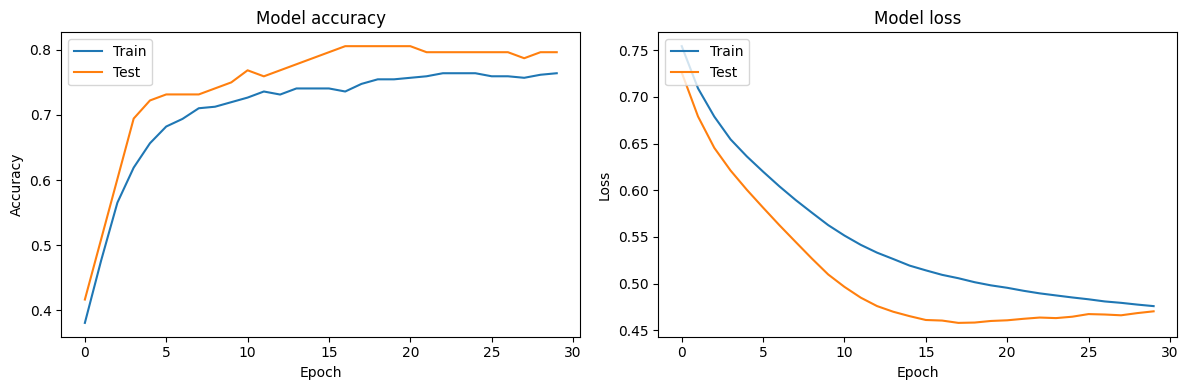

In [69]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)